In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn
import statsmodels.formula.api as sm

In [3]:
#Load data
data = pd.read_csv("D:/LR_11.csv", header=0)
print("Data shape : ",data.shape)
print(data.head())
print(data.dtypes)


Data shape :  (10, 3)
   House Price  Square Feet City
0          245         1400    N
1          312         1600    Y
2          279         1700    N
3          308         1875    Y
4          199         1100    N
House Price     int64
Square Feet     int64
City           object
dtype: object


In [4]:
#Get all categorical variables and create dummies
obj = data.dtypes == np.object
print(obj)
dummydf = pd.DataFrame()   

for i in data.columns[obj]:
    dummy = pd.get_dummies(data[i], drop_first=True)
    dummydf = pd.concat([dummydf, dummy], axis=1)
print(dummydf)

House Price    False
Square Feet    False
City            True
dtype: bool
   Y
0  0
1  1
2  0
3  1
4  0
5  0
6  1
7  1
8  1
9  0


In [6]:
#Merge the dummy and dataset
data1 = data
data1 = pd.concat([data1,dummydf], axis=1)
print("head \n",data1.head())
obj1 = data1.dtypes == np.object
print(obj1)
data1 = data1.drop(data1.columns[obj1], axis=1)
print("head after removal \n",data1.head())

head 
    House Price  Square Feet City  Y
0          245         1400    N  0
1          312         1600    Y  1
2          279         1700    N  0
3          308         1875    Y  1
4          199         1100    N  0
House Price    False
Square Feet    False
City            True
Y              False
dtype: bool
head after removal 
    House Price  Square Feet  Y
0          245         1400  0
1          312         1600  1
2          279         1700  0
3          308         1875  1
4          199         1100  0


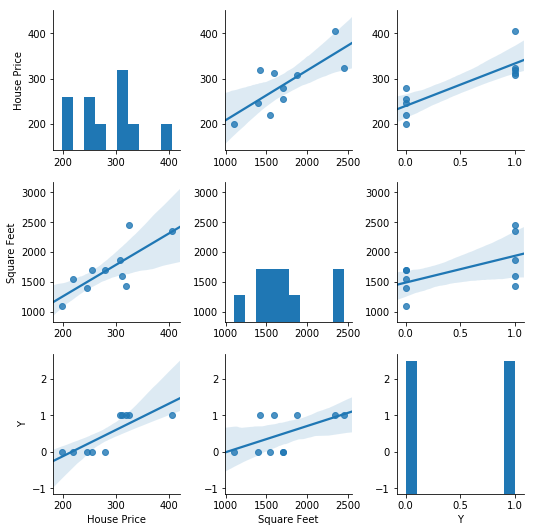

In [7]:

#Declare the dependent variable and create your independent and dependent datasets
dep = 'House Price'
X = data1.drop(dep, axis=1)
Y = data1[dep]

#Scatter plots
seaborn.pairplot(data1, kind='reg')


In [8]:
import sklearn.cross_validation
#Split into train and test
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size=0.20, random_state=5)

E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
#Run model
lm = sm.OLS( Y_train, X_train ).fit()
lm.summary()

E:\anaconda\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     143.1
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           8.65e-06
Time:                        12:59:29   Log-Likelihood:                -41.550
No. Observations:                   8   AIC:                             87.10
Df Residuals:                       6   BIC:                             87.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Square Feet     0.1567      0.019      8.163      0.000       0.110       0.204
Y              29.5832     43.518      0.680      0.522     -76.900     136.067
==============================================================================
Omnibus:                        6.866   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                1.994
Skew:                          -1.151   Prob(JB):                        0.369
Kurtosis:                       3.826   Cond. No.                     4.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#to check residual behaviour 
pred_train = lm.predict(X_train)
err_train = pred_train - Y_train
print(err_train)
#Predict
pred_test = lm.predict(X_test)
err_test = pred_test - Y_test

2   -12.593497
4   -26.619321
7    89.521951
1   -31.681301
0   -25.606409
8   -66.105500
6    -7.149020
3    15.413869
dtype: float64


Text(0.5,1,'Main')

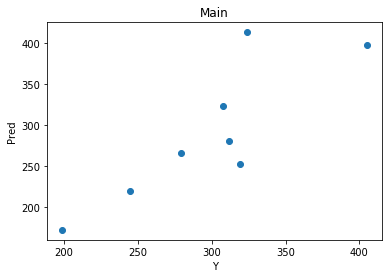

In [11]:
#Actual vs predicted plot
plt.scatter(Y_train, pred_train)
plt.xlabel('Y')
plt.ylabel('Pred')
plt.title('Main')

In [12]:
#Root Mean sq error
rmse = np.sqrt(np.mean((err_test))**2)
rmse

17.65327537918742

Text(0,0.5,'Residuals')

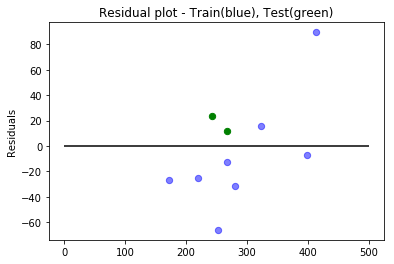

In [13]:
#Residual plots
plt.scatter(pred_train, err_train, c="b", s=40, alpha=0.5)
plt.scatter(pred_test,err_test, c="g", s=40)
plt.hlines(y=0, xmin=0, xmax=500)
plt.title('Residual plot - Train(blue), Test(green)')
plt.ylabel('Residuals')

             Square Feet         Y
Square Feet     1.000000  0.567578
Y               0.567578  1.000000


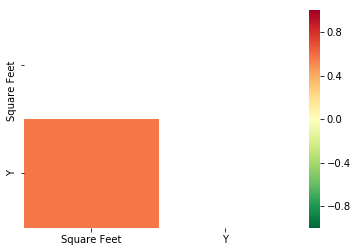

In [14]:
#multicollinearity
#cor=X.corr(method='spearman')
cor=X.corr(method='pearson')
print(cor)
#Create a mask to diplay only lower triangle of the matrix
mask=np.zeros_like(cor)
mask[np.triu_indices_from(mask)]=True
seaborn.heatmap(cor,vmax=1,vmin=-1,cmap='RdYlGn_r',mask=mask)

In [15]:
data.head()

,House Price,Square Feet,City
0,245,1400,N
1,312,1600,Y
2,279,1700,N
3,308,1875,Y
4,199,1100,N


E:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


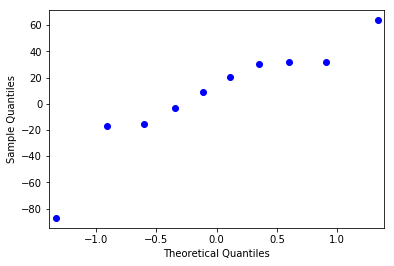

0    32.100919
1    30.104063
2    20.479687
3   -15.715400
4    31.722150
5   -16.709697
6     9.050983
7   -87.156094
8    63.716448
9    -3.520313
dtype: float64


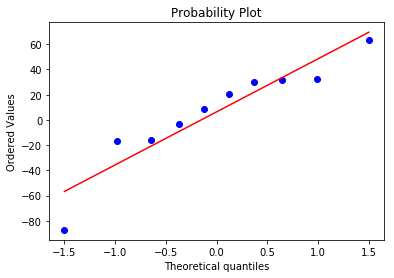

In [16]:
#Normal distribution
import statsmodels.api as sma
lm = sm.OLS(Y,X).fit()
datares = pd.concat([data, pd.Series(lm.resid, name = 'resid'), pd.Series(lm.predict(), name = "predict")], axis = 1)

sma.qqplot(datares.resid)
plt.show()
print(lm.resid)

import scipy.stats as scipystats
import pylab
scipystats.probplot(datares.resid, dist="norm", plot=pylab)
pylab.show()

In [18]:
#Kilmogorov-Smirnov test
resid = datares.resid
norm_resid = (datares.resid - np.mean(datares.resid)) / np.std(datares.resid)
print(scipystats.kstest(norm_resid, 'norm'))
#In the Kilmogorov-Smirnov test -> p-value is large so we can't reject that residual are normally distributed

KstestResult(statistic=0.17679635696459076, pvalue=0.91340913922123124)


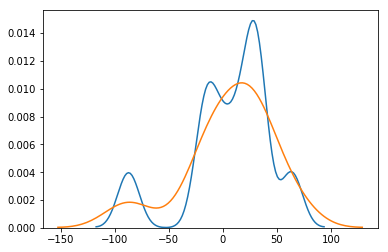

In [19]:
import seaborn as sns
sns.kdeplot(np.array(datares.resid), bw=10)
sns.distplot(np.array(datares.resid), hist=False)

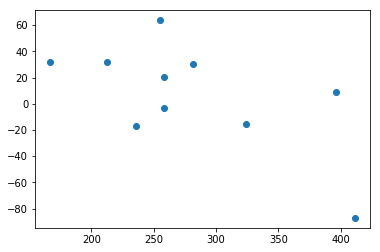

In [20]:
#Homoscedasticity 
resid = lm.resid
plt.scatter(lm.predict(), resid)

In [22]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [23]:
lm.fit(X_train, Y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
X_train.columns

Index(['Square Feet', 'Y'], dtype='object')

In [25]:
lm.coef_

array([  0.06534609,  57.31311352])